<a href="https://colab.research.google.com/github/krinapatel1211/PythonTutorial/blob/master/Pima_Diabetes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Regression with Pima Indian Diabetes dataset </h1>

- Pregnancies — Number of times pregnant
- GlucosePlasma — glucose concentration 2 hours in an oral glucose tolerance test
- Blood Pressure — Diastolic blood pressure (mm Hg)
- SkinThickness — Triceps skin-fold thickness (mm)
- Insulin — Two hours of serum insulin (mu U/ml)
- BMI — Body mass index (weight in kg/(height in m)²)
- Diabetes Pedigree Function — Diabetes pedigree function
- Age — Age in years
- Outcome — Class variable (0 or 1)

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn import metrics

In [8]:
def normalize_features(X_train, X_test):
  mmx = MinMaxScaler()
  X_train = mmx.fit_transform(X_train)
  X_test = mmx.transform(X_test)
  return X_train, X_test

In [9]:
def evaluate(y_test, y_pred):
  print("Accuracy Score: ", metrics.accuracy_score(y_test, y_pred))
  print("Confusion Matrix: ", metrics.confusion_matrix(y_test, y_pred))
  print("Classification report: ", metrics.classification_report(y_test, y_pred))

In [10]:
def get_stat(df):
    # add range
    new_row = df.loc['max']-df.loc['min']
    new_row.name = 'range'
    df = df.append(new_row)

    # add IQR
    new_row = df.loc['75%']-df.loc['25%']
    new_row.name = 'IQR'
    df = df.append(new_row)

    # add skewness
    new_row = (3*(df.loc['mean']-df.loc['50%']))/df.loc['std']
    new_row.name = 'skewness'
    df = df.append(new_row)
    return df

In [11]:
columns = ['pregnant_count',
                'plasma_glucose',
                'bp',
                'skin_thickness',
                'insulin',
                'bmi',
                'dpf',
                'age',
                'label']

In [12]:
df = pd.read_csv('pima-indians-diabetes.csv', names=columns)
df

,pregnant_count,plasma_glucose,bp,skin_thickness,insulin,bmi,dpf,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Data Visualisation

In [13]:
df.isnull().sum()

pregnant_count    0
plasma_glucose    0
bp                0
skin_thickness    0
insulin           0
bmi               0
dpf               0
age               0
label             0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pregnant_count  768 non-null    int64  
 1   plasma_glucose  768 non-null    int64  
 2   bp              768 non-null    int64  
 3   skin_thickness  768 non-null    int64  
 4   insulin         768 non-null    int64  
 5   bmi             768 non-null    float64
 6   dpf             768 non-null    float64
 7   age             768 non-null    int64  
 8   label           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
df.describe()

,pregnant_count,plasma_glucose,bp,skin_thickness,insulin,bmi,dpf,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
get_stat(df.describe())

<ipython-input-10-904213ae159b>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
<ipython-input-10-904213ae159b>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)
<ipython-input-10-904213ae159b>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row)


,pregnant_count,plasma_glucose,bp,skin_thickness,insulin,bmi,dpf,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000
range,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.342000,60.000000,1.000000
IQR,5.000000,41.250000,18.000000,32.000000,127.250000,9.300000,0.382500,17.000000,1.000000


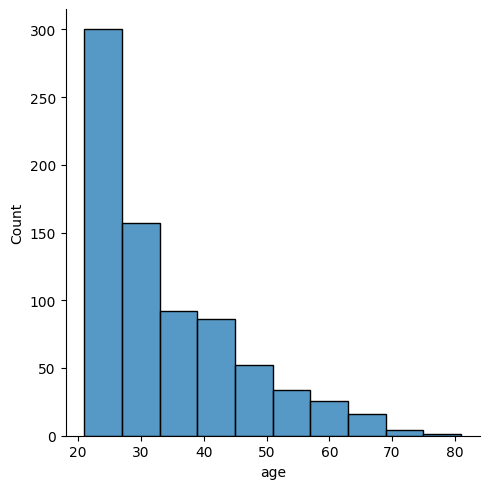

In [17]:
sns.displot(df['age'], bins=10)

In [18]:
sns.__version__

'0.13.1'

In [19]:
# pip install seaborn --upgrade

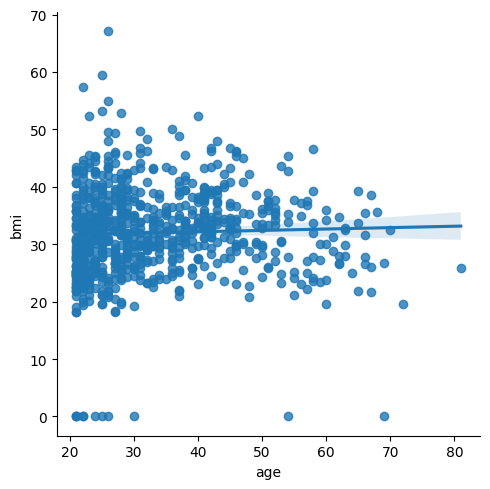

In [20]:
sns.lmplot(df, x='age', y='bmi')

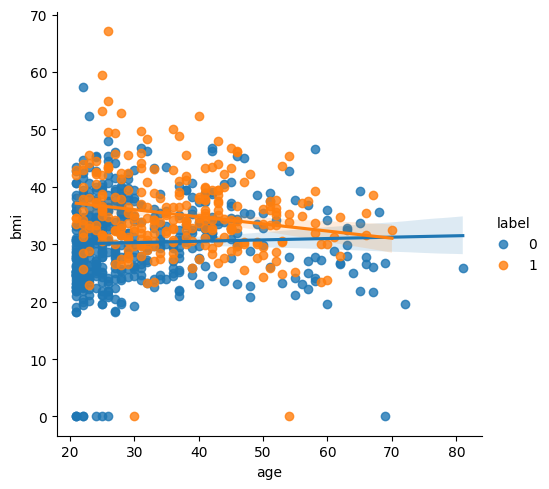

In [21]:
sns.lmplot(df, x='age', y='bmi', hue='label')

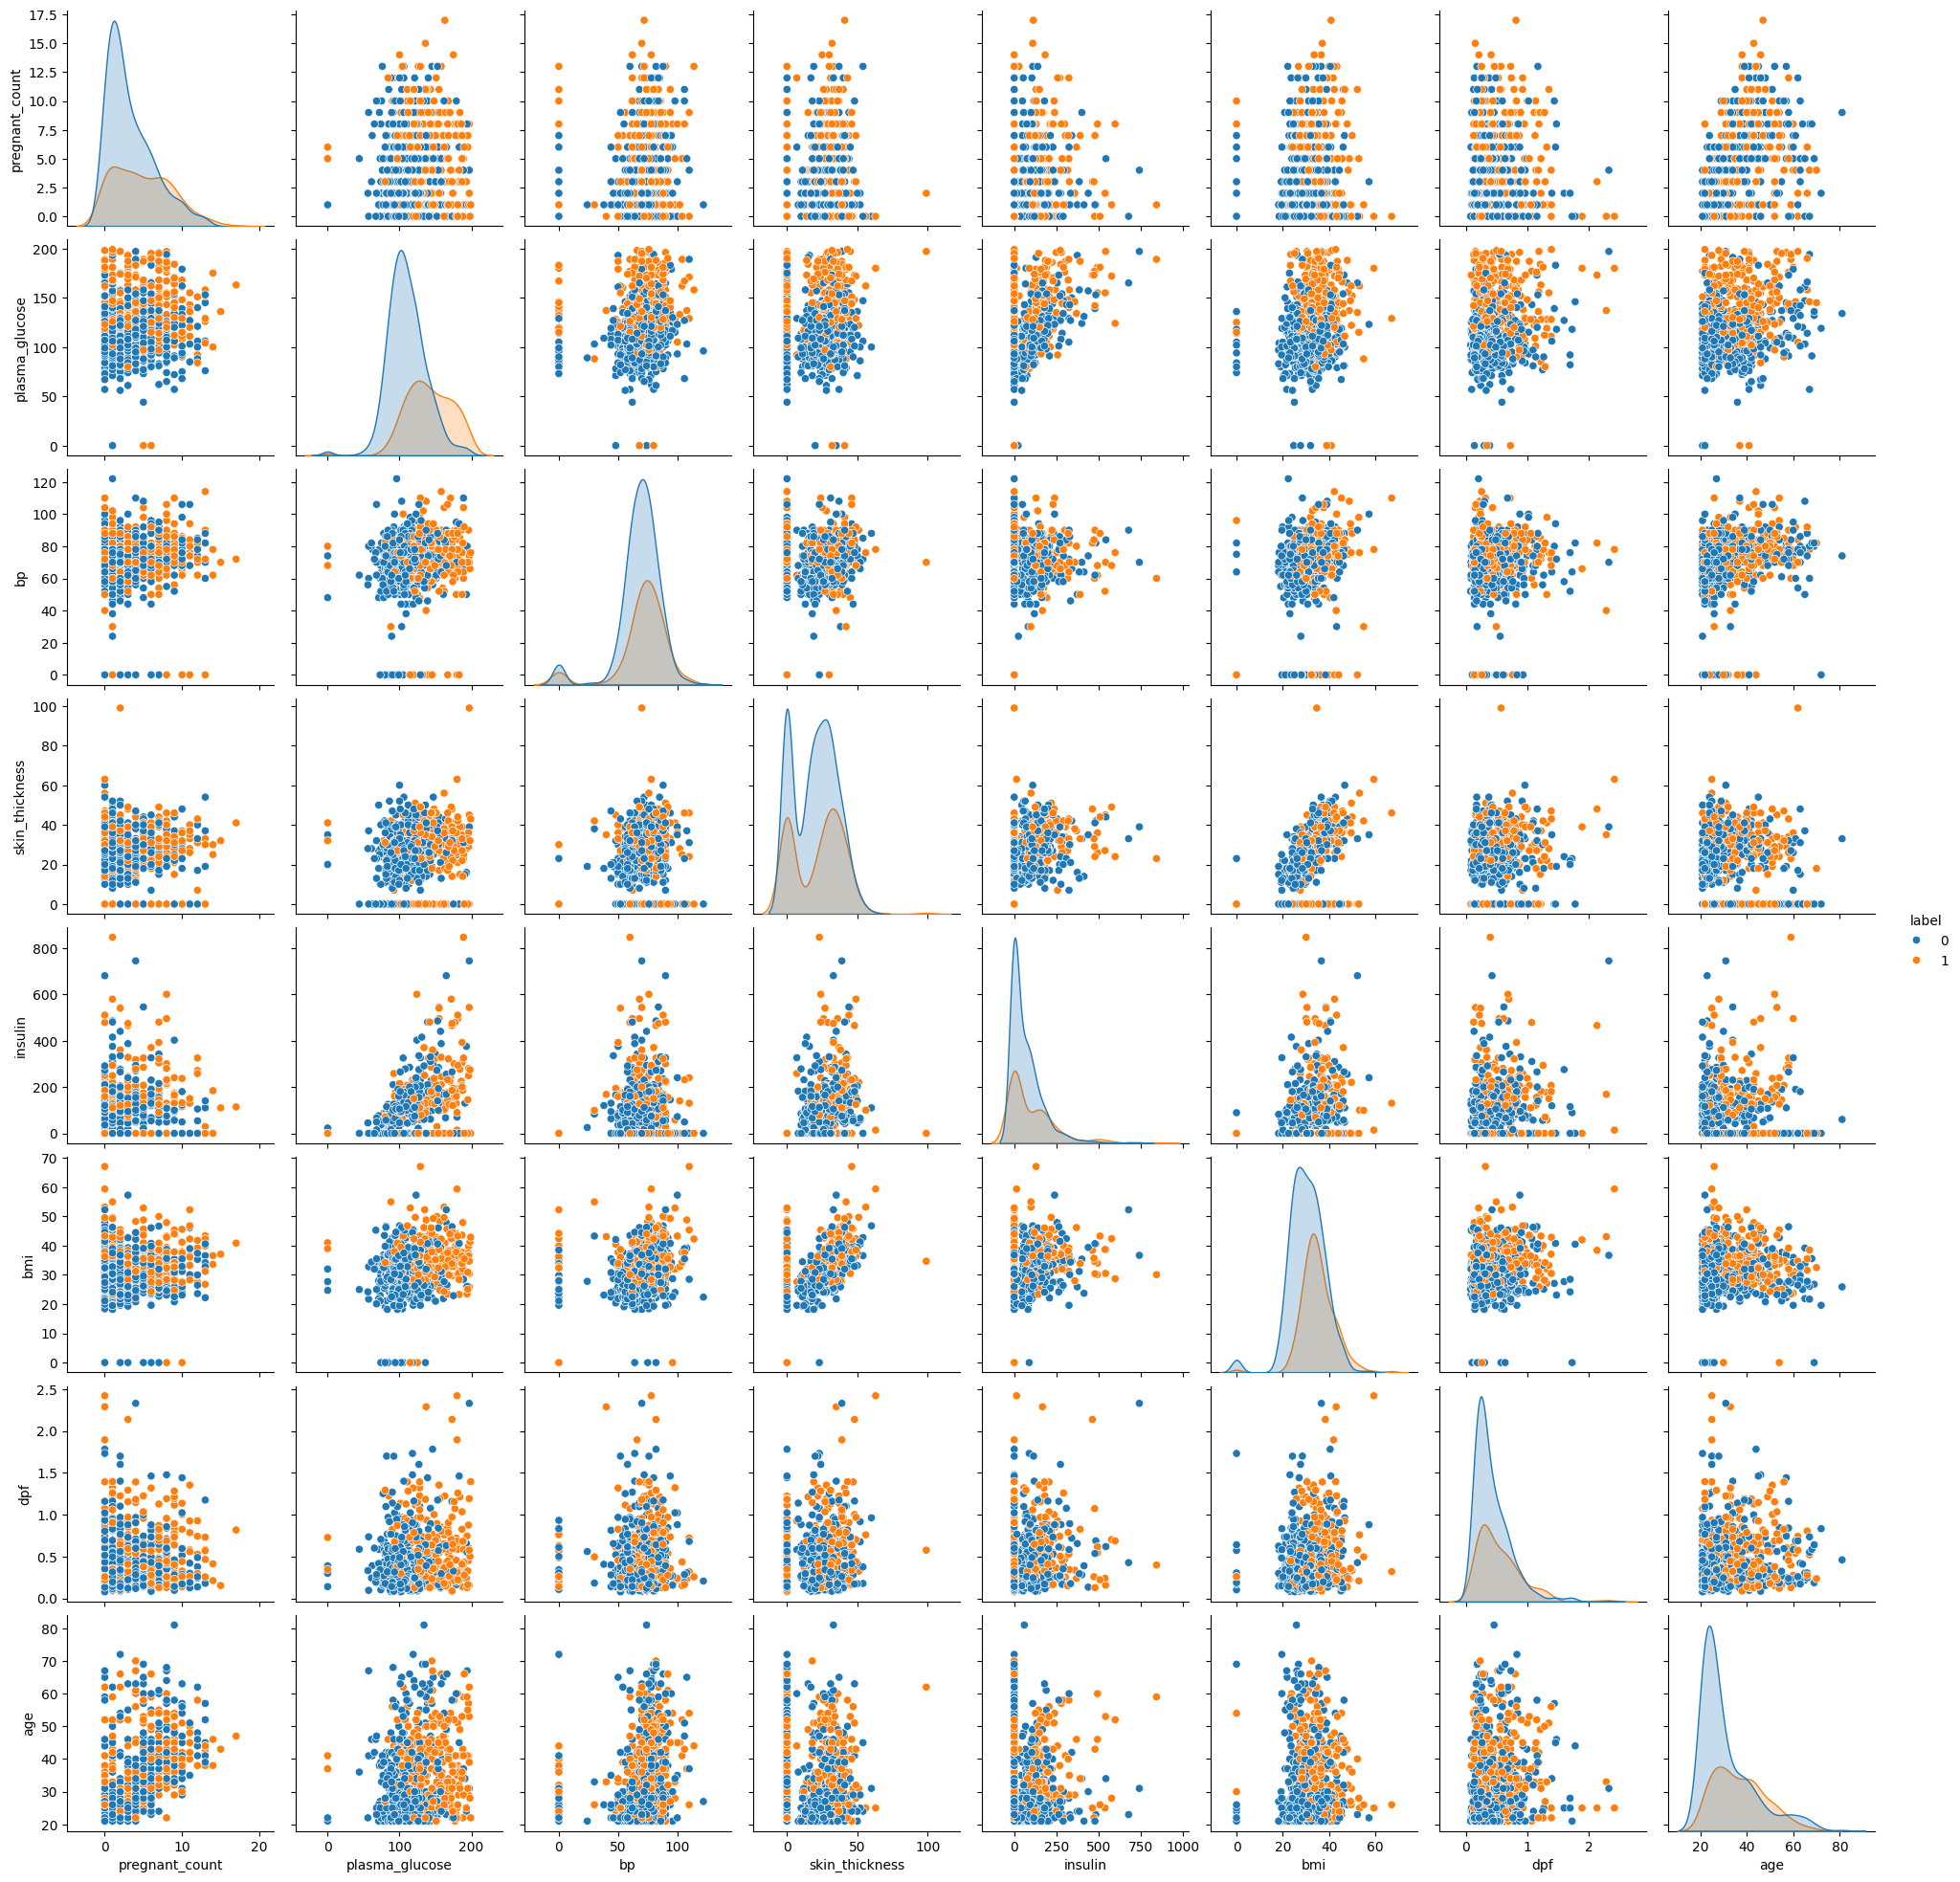

In [22]:
sns.pairplot(df, hue='label')

<Axes: >

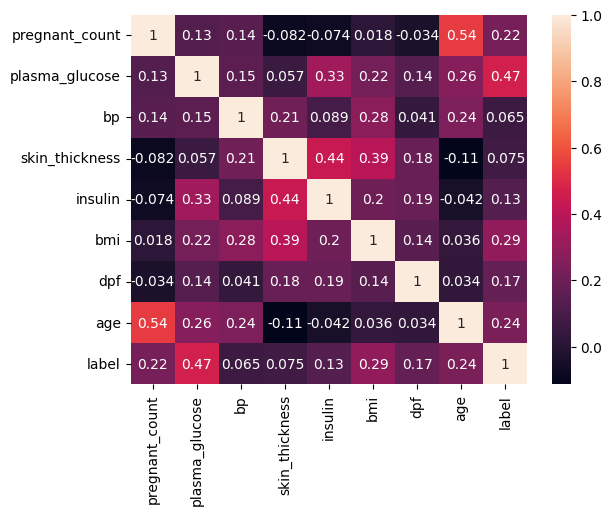

In [23]:
sns.heatmap(df.corr(), annot=True)

## **Data** **Preparation**

In [24]:
x = df.drop('label', axis=1)
y = df.label
x.shape, y.shape

((768, 8), (768,))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [26]:
X_train.head()

,pregnant_count,plasma_glucose,bp,skin_thickness,insulin,bmi,dpf,age
158,2,88,74,19,53,29.0,0.229,22
573,2,98,60,17,120,34.7,0.198,22
429,1,95,82,25,180,35.0,0.233,43
740,11,120,80,37,150,42.3,0.785,48
589,0,73,0,0,0,21.1,0.342,25


In [27]:
X_train_scaled, X_test_scaled = normalize_features(X_train, X_test)

## ML MODELS

In [32]:
lr = LinearRegression().fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

In [41]:
# y_pred_class = np.round(y_pred,0).astype(int)
y_pred_class = np.where(y_pred >= 0.5, 1, 0)
y_pred_class

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [42]:
evaluate(y_test, y_pred_class)

Accuracy Score:  0.7727272727272727
Confusion Matrix:  [[91  8]
 [27 28]]
Classification report:                precision    recall  f1-score   support

           0       0.77      0.92      0.84        99
           1       0.78      0.51      0.62        55

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



## Logistic Regression

In [43]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [44]:
y_pred = log_reg.predict(X_test_scaled)


In [45]:
evaluate(y_test, y_pred)

Accuracy Score:  0.7727272727272727
Confusion Matrix:  [[91  8]
 [27 28]]
Classification report:                precision    recall  f1-score   support

           0       0.77      0.92      0.84        99
           1       0.78      0.51      0.62        55

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154

